In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torch
import torch.nn as nn
from ignite.engine import create_supervised_trainer, Events
from ignite.contrib.handlers import ProgressBar
from ignite.metrics import RunningAverage
from torch.utils.data import DataLoader

from berlin.config import Config
from berlin.dataset import AutoencoderDataset
from berlin.model.autoencoder import Autoencoder

In [3]:
BATCH_SIZE = 32
EPOCHS = 5

In [4]:
conf = Config()
dataset = AutoencoderDataset(conf)
data_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=1, pin_memory=True)

autoencoder = Autoencoder()

optimizer = torch.optim.Adam(autoencoder.parameters())
criterion = nn.MSELoss()

trainer = create_supervised_trainer(autoencoder, optimizer, criterion, 'cuda')

In [5]:
RunningAverage(output_transform=lambda x: x).attach(trainer, 'loss')

In [6]:
pbar = ProgressBar(persist=True)
pbar.attach(trainer, ['loss'])

/home/kureta/.local/share/virtualenvs/berlin-u-gTVPWS/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [7]:
trainer.run(data_loader, max_epochs=EPOCHS)

/home/kureta/.local/share/virtualenvs/berlin-u-gTVPWS/lib/python3.7/site-packages/torch/nn/functional.py:2533: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [11]:
with torch.no_grad():
    x_hat = autoencoder((dataset.image_data.data[:32].cuda(), dataset.audio_data.data[:32].cuda()))

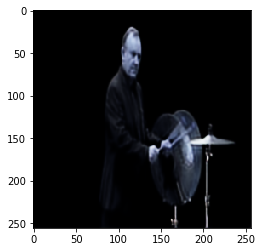

In [12]:
image = x_hat[31].cpu().permute(1, 2, 0).numpy()
plt.imshow(image)